In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

#Import the datetime module from datetime library
from datetime import datetime

#Import the requests library
import requests

#Import the API key
from config import weather_api_key

#Starting URL for Weather Map API call
url="http://api.openweathermap.org/data/2.5/weather?units=Imperialq=city&appid=" +weather_api_key

In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lats_lngs=zip(lats,lngs)
lats_lngs

#can only unzip a zipped tuple once before it's removed from memory. Unzip to a list before moving on.

In [3]:
#Add the lat and long combinations to a list
coordinates = list (lats_lngs)

In [4]:
#Create a list for holding the cities
cities=[]

# Identify the nearest city for each lat and long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If city is unique, add it to the cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

605

In [5]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

#Create the counters
record_count = 1
set_count = 1

Beginning Data Retrieval
------------------------


In [6]:
# Loop through all the cities in our list:
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>=50):
        set_count +=1
        record_count +=1
        
    #Create end point URL with each city
    city_url = url+"&q="+city.replace(" ","+")
        
    #Log the URL, record, and set numbers in the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Increment record count
    record_count +=1
    
    # Run an API request for each of the cities
    try:
        #Parse the JSON and retreive data
        city_weather=requests.get(city_url).json()
        
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
    
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%y-%m-%d %H:%M:%S')
    
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat":city_lat,
                          "Lng":city_lng,
                          "Max Temp":city_max_temp,
                          "Humidity":city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed":city_wind,
                          "Country":city_country,
                          "Date":city_date})
    
    #If an error occurs, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | hofn
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | vostok
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | kahului
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | salalah
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | margate
Processing Record 16 of Set 1 | mount isa
Processing Record 17 of Set 1 | qaqortoq
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | tongren
Processing Record 20 of Set 1 | sola
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | hasaki
Processing Record 23 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 24 of Set 1

Processing Record 190 of Set 4 | codrington
Processing Record 191 of Set 4 | katangli
Processing Record 192 of Set 4 | lorengau
Processing Record 193 of Set 4 | belyy
Processing Record 194 of Set 4 | kaniama
Processing Record 195 of Set 4 | linda
Processing Record 196 of Set 4 | krasnyy kut
Processing Record 197 of Set 4 | okhotsk
Processing Record 198 of Set 4 | sinjar
Processing Record 199 of Set 4 | mar del plata
Processing Record 200 of Set 4 | kushmurun
Processing Record 201 of Set 4 | bethel
Processing Record 202 of Set 4 | guerrero negro
Processing Record 203 of Set 4 | ijaki
City not found. Skipping...
Processing Record 205 of Set 5 | yumen
Processing Record 206 of Set 5 | hovd
Processing Record 207 of Set 5 | bandarbeyla
Processing Record 208 of Set 5 | saint george
Processing Record 209 of Set 5 | tripoli
Processing Record 210 of Set 5 | nalut
Processing Record 211 of Set 5 | banda aceh
Processing Record 212 of Set 5 | tarhunah
City not found. Skipping...
Processing Record 21

Processing Record 376 of Set 8 | port-cartier
Processing Record 377 of Set 8 | toliary
City not found. Skipping...
Processing Record 378 of Set 8 | mandalgovi
Processing Record 379 of Set 8 | catemaco
Processing Record 380 of Set 8 | mayo
Processing Record 381 of Set 8 | otsuki
Processing Record 382 of Set 8 | kashiwazaki
Processing Record 383 of Set 8 | balakhninskiy
Processing Record 384 of Set 8 | thompson
Processing Record 385 of Set 8 | salta
Processing Record 386 of Set 8 | olafsvik
Processing Record 387 of Set 8 | blagesti
Processing Record 388 of Set 8 | tank
Processing Record 389 of Set 8 | ulladulla
Processing Record 390 of Set 8 | balabac
Processing Record 391 of Set 8 | oyama
Processing Record 392 of Set 8 | owando
Processing Record 393 of Set 8 | celestun
Processing Record 394 of Set 8 | amarante do maranhao
Processing Record 395 of Set 8 | bontang
Processing Record 396 of Set 8 | iskateley
Processing Record 397 of Set 8 | jabiru
City not found. Skipping...
Processing Reco

Processing Record 557 of Set 11 | hurghada
Processing Record 558 of Set 11 | saint-junien
Processing Record 559 of Set 11 | hereford
Processing Record 560 of Set 11 | kukmor
Processing Record 562 of Set 12 | muncar
Processing Record 563 of Set 12 | lolua
City not found. Skipping...
Processing Record 564 of Set 12 | hihifo
City not found. Skipping...
Processing Record 565 of Set 12 | pimentel
Processing Record 566 of Set 12 | tetouan
Processing Record 567 of Set 12 | broome
Processing Record 568 of Set 12 | phichit
Processing Record 569 of Set 12 | mpika
Processing Record 570 of Set 12 | biak
Processing Record 571 of Set 12 | talnakh
Processing Record 572 of Set 12 | itoman
Processing Record 573 of Set 12 | pacific grove
Processing Record 574 of Set 12 | bahia honda
Processing Record 575 of Set 12 | hato mayor
Processing Record 576 of Set 12 | tabou
Processing Record 577 of Set 12 | aquiraz
Processing Record 578 of Set 12 | traverse city
Processing Record 579 of Set 12 | abrau-dyurso
Pr

In [7]:
#copnver the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,278.25,76,100,5.53,US,21-10-23 01:31:58
1,Albany,42.6001,-73.9662,282.12,81,48,2.34,US,21-10-23 01:36:14
2,Atuona,-9.8000,-139.0333,298.64,79,23,7.69,PF,21-10-23 01:36:14
3,Ushuaia,-54.8000,-68.3000,277.96,75,75,5.66,AR,21-10-23 01:32:23
4,Bredasdorp,-34.5322,20.0403,287.75,72,100,10.29,ZA,21-10-23 01:31:47
5,Hofn,64.2539,-15.2082,281.47,98,100,7.32,IS,21-10-23 01:36:15
6,Vaini,-21.2000,-175.2000,298.24,78,75,5.14,TO,21-10-23 01:36:15
7,Vostok,46.4856,135.8833,277.86,57,19,2.97,RU,21-10-23 01:36:15
8,Hobart,-42.8794,147.3294,286.49,91,75,4.12,AU,21-10-23 01:35:38
9,Kahului,20.8947,-156.4700,302.16,69,20,8.75,US,21-10-23 01:32:14


In [8]:
#New column order
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,21-10-23 01:31:58,57.7900,-152.4072,278.25,76,100,5.53
1,Albany,US,21-10-23 01:36:14,42.6001,-73.9662,282.12,81,48,2.34
2,Atuona,PF,21-10-23 01:36:14,-9.8000,-139.0333,298.64,79,23,7.69
3,Ushuaia,AR,21-10-23 01:32:23,-54.8000,-68.3000,277.96,75,75,5.66
4,Bredasdorp,ZA,21-10-23 01:31:47,-34.5322,20.0403,287.75,72,100,10.29
5,Hofn,IS,21-10-23 01:36:15,64.2539,-15.2082,281.47,98,100,7.32
6,Vaini,TO,21-10-23 01:36:15,-21.2000,-175.2000,298.24,78,75,5.14
7,Vostok,RU,21-10-23 01:36:15,46.4856,135.8833,277.86,57,19,2.97
8,Hobart,AU,21-10-23 01:35:38,-42.8794,147.3294,286.49,91,75,4.12
9,Kahului,US,21-10-23 01:32:14,20.8947,-156.4700,302.16,69,20,8.75


In [13]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the output file
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [14]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity= city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

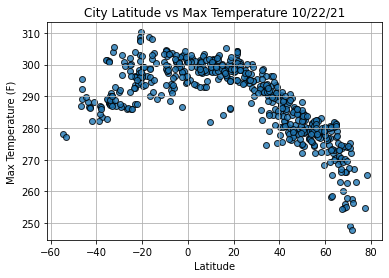

In [15]:
#Import the time module
import time

#build the scatter plot for lat and max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label = "Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()



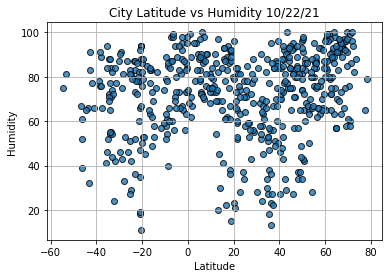

In [17]:
#Import the time module
import time

#build the scatter plot for lat and max temp
plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label = "Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()



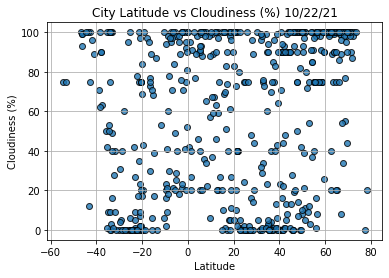

In [18]:
#Import the time module
import time

#build the scatter plot for lat and max temp
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label = "Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()


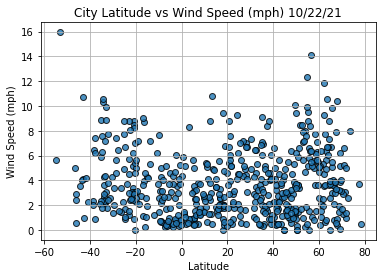

In [19]:
#Import the time module
import time

#build the scatter plot for lat and max temp
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label = "Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()